# Tutorial 2 - Übung 1: Einstieg
Zuerst machen wir eine einfache Zeitreihenrechnung.

## Schritt 1 - Synthetische Messwerte für 1 Tag
Im folgenden Beispiel, nehmen wir keine realen Messwerte, sondern "bauen" uns selbst die Messwerte über die Sinusfunktion. Zuerst erstellen wir einen Array (Zahlenreihe) für die Zeit. Wir nehmen an, dass die Sonne um 6:00 aufgeht und um 18:00 untergeht. Über Mittag erreicht die Strahlung einen Wert von 650 W/m2. 


In [1]:
# Bibliotheken Import
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Funktionsdefinition (benötigen wir später)
cos  = lambda arg : np.cos(np.deg2rad(arg))
sin  = lambda arg : np.sin(np.deg2rad(arg))
acos = lambda arg : np.rad2deg(np.arccos(arg))
asin = lambda arg : np.rad2deg(np.arcsin(arg))

t = np.linspace(6,18,1000)
deltaT = 12/1000

Strahlungsarray (Zahlenreihe für die Strahlung in W/m2). Beachte das die Funktion sin() oben mit dem lambda-Operator definiert wurde und in Grad angegeben wird. Dies ist nicht bei der Funktion np.sin() der Fall.

In [2]:
H = 650 * sin((t-6)/(18-6)*180)

Überprüfe ob der Zeitarray aus lauter Spaltenwerte (Zeile mit vielen Zahlen) oder aus lauter Zeilenwerte (Spalte mit vielen Zahlen) besteht. Spalte = column. Zeile = row.

In [3]:
np.shape(t)

(1000,)

Stelle den Strahlungsverlauf als figure dar mit der Linienfarbe grün (g=green)

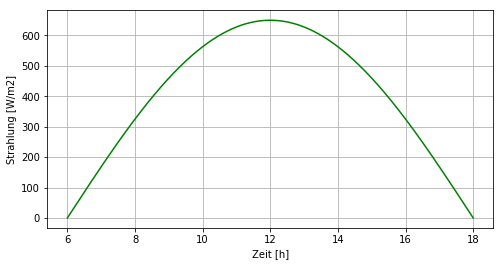

In [4]:
plt.figure(2, figsize=(8,4))
plt.plot(t,H, 'g')
plt.xlabel('Zeit [h]')
plt.ylabel('Strahlung [W/m2]')
plt.grid()

Nun können wir die Strahlungsenergie $W_H$ für diesen einen Tag berechnen. Beachate das die Berechung der "Energie = Leistung mal Zeit" ist, das Fundamentale in der Energierechnung. Hier ist der Zeitschritt "deltaT".

In [6]:
A = 1 # Fläche 1 m2
wH = np.sum(H)*deltaT*A/1000
print('Strahlungsenergie [kWh/m2/Tag]: ' + str(wH))

Strahlungsenergie [kWh/m2/Tag]: 4.960664502083386


Nun haben wir folgende Punkte gelernt:
1. Erstellen eines Arrays.
2. Darstellen von Arrays, inklusiv Beschriftung.
3. Berechnen eines Flächenintegrals aus diskreten Werten, d.h. Aufsummieren von Werten.

## Schritt 2 - Synthetische Messwerte für 7 Tag
Nun wollen wir die Strahlungsenergie von 7 Tagen berechnen. Wir ändern den Zeit-Array. Wir beginnen mit der Stunde 0 und Enden mit der Stunde 7 x 24. Die Schrittweite können wir beibehalten.
Wenn wir den Zeit-Array geändert haben und eine Plot-Figure erstellen, sehen wir den sinusförmigen Strahlungsverlauf. Allerdings mit negativer Halbwelle, d.h. negative Strahlungswerten, was nicht richtig ist. Die Annäherung der Strahlung durch die Sinusfunktion macht Sinn für den Tag (6:00 bis 18:00) aber macht keinen Sinn für die Nacht (18:00 bis 6:00). Wir korrigieren dies indem wir alle Strahlungswerte, welche negativ sind, auf 0 setzten.

In [7]:
H[H<0] = 0

Der Ausdruck "H<0" generiert ein Selektor-Array der Länge von H, bei dem die Positionen mit "1" gekennzeichnet sind, bei welchen der Wert < 0 ist, der Rest ist mit "0" gekennzeichnet. Der Ausdruck H[Selektor-Array] = 0 weisst allen Positionen = 1 eine 0 zu. 

Denkbar ist auch "M[N<1] = 2". M und N müssen gleich lange Arrays sein. Im Array M werden alle Stellen auf 2 gesetzt, bei denen der Wert im Array N < 1 ist. Wenn nun diese Zeile im Skript-File ergänzt wird so kann ein korrekter Kurvenverlauf (nur positive Werte) dargestellt werden. Berechne die Strahlungsenergie für die 7 Tage.

# Tutorial 2 - Übung 2: Berechnung Strahlungsenergie von mehreren Tagen mit Messdaten
Nun verwenden wir nicht "künstliche" Strahlungswerte (generiert durch die Sinusfunktion), sondern reale Messwert. Hierzu benötigen wir eine Datendatei. Wir erstellen wieder einen Plot mit dem Strahlungsverlauf über 7 Tage. Nun wollen wir nicht nur die Strahlung (=Globalstrahlung) auf die 1m2-Fläche darstellen, sondern auch die Strahlungskomponenten. Die Globalstrahlung "hGlob" setzt sich aus Diffusstrahlung "hDiff" und Direktstrahlung "hDir" zusammen. Zu den Strahlungswerten in den Messdaten ist auch der Messzeitpunkt enthalten, allerdings wird dieser als Textstring eingelesen. 

Bei Energiesimulationen ist es empfehlenswert als Kommentar die Einheit anzugeben, sodass verständlich ist um was es sich handelt, z.B. [grad] oder [radiant] oder [W]  oder [kWh].

Verwende für dieses Tutorial ein neues py-File.

Zuerst importieren wir die "datetime"-Bibliothek, welche wir für Berechnungen im Zeitformat benötigen. Es gibt viele Möglichkeiten Daten zu importieren, vermutlich auch elegantere. Wir verwenden zum Import der csv-Daten "loadtxt" von der numpy-Bibliothek, dabei importieren wir das Datumsformat (als Unicode) separat von den Zahlen (float). 

Die csv-Datei ist auf github [https://github.com/markstaler/pv4ing](https://github.com/markstaler/pv4ing). Wir geben auch die zeitliche Auflösung der Daten an (brauchen wir später). 

In [8]:
# Datenimport
data   = np.loadtxt('2017_DataExport15min.csv', delimiter=';', skiprows = 1, usecols = [1,2,3,4,5])
hGlo   = data[:,0]  # [W/m2] 
hDif   = data[:,1]  # [W/m2]
tAmb   = data[:,2]  # [W/m2]
pLoad  = data[:,3]  # [W] Verbrauchsprofil
zapf   = data[:,4] # [l/15min] Profil für Warmwasserbezug

tutcIn = np.loadtxt('2017_DataExport15min.csv', dtype='U', delimiter=';', skiprows = 1, usecols = [0])
tutc = [] # leere Liste
for t in range(tutcIn.size):
    tutc.append(dt.datetime.strptime(tutcIn[t], '%Y-%m-%d %H:%M:%S'))
tutc = np.array(tutc) # umwandeln in ein numpy Array

So haben wir "tutc" als einen Array in datetime-Format. Zusätzlich erzeugen wir nun einen Array mit laufenden Stunden, beginnend mit Stunde 0 bei Jahresamfang. Diesen benötigen wir aber erst später zur Sonnenstandsberechung.

In [9]:
lfStd = np.zeros(tutc.size)
for t in range(tutc.size):
    # berechnet laufender Tag im Jahr
    noDay = (tutc[t] - dt.datetime(tutc[0].year, 1, 1, 0)).days 
    # [h] berechnet laufende Stunde im Tag in UTC!
    noHou = tutc[t].hour + (tutc[t].minute)/60.0 + (tutc[t].second)/3600.0 
    lfStd[t] = noDay*24 + noHou
    
deltaT = lfStd[1] - lfStd[0] # [h]

## Schritt 1
Es soll die Globalstrahlung in grün, Direktstrahlung in rot und Diffusstrahlung in blau dargestellt werden, über die Zeitachse. Weiter soll in der Plot-Figure eine Legende mit den Kurvennamen dargestellt werden. Als Ausschnitt wollen wir die ersten 7 Tage betrachten, d.h. in der Plotfunktion grenzen wir den Array ein durch tutc[a:e], wobei a für den Anfangsindex und e für den Endindex steht.

## Schritt 2
Wenn wir den ersten Tag im Plot ansehen, so fällt auf, dass negative Strahlungswerte vorkommen. Dies entspricht den Messergebnissen aber nicht der Realität. Deshalb sollen die Strahlungsdaten bereinigt werden.
 

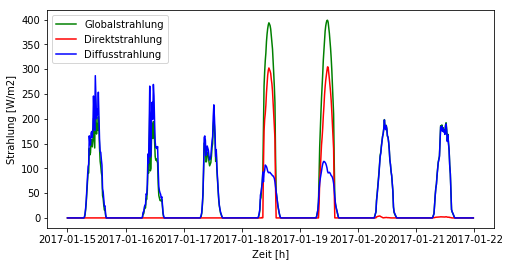

In [10]:
hDir = hGlo - hDif

hDir[hDir<0] = 0  # wichtig
hDif[hDif<0] = 0  # wichtig
hGlo[hGlo<0] = 0  # wichtig

a=int(0)           # Anfangstag
e=int(7*24/deltaT) # Endtag

plt.figure(3, figsize=(8,4))# Grösse des Plots (figsize) in Zoll
plt.plot_date(tutc[a:e],hGlo[a:e],'g', label ='Globalstrahlung')
plt.plot_date(tutc[a:e],hDir[a:e],'r', label ='Direktstrahlung')
plt.plot_date(tutc[a:e],hDif[a:e],'b', label ='Diffusstrahlung')
plt.xlabel('Zeit [h]');
plt.ylabel('Strahlung [W/m2]');
leg = plt.legend(loc="upper left")

# Schritt 3
Nun berechnen wir die Strahlungsenergie über das gesamte Jahr.

In [11]:
wGlo = np.sum(hGlo)*deltaT/1000 # [kWh/m2] Jahresstrahlungsenergie Globalstrahlung
wDir = np.sum(hDir)*deltaT/1000 # [kWh/m2] Jahresstrahlungsenergie Direktstrahlung
wDif = np.sum(hDif)*deltaT/1000 # [kWh/m2] Jahresstrahlungsenergie Diffusstrahlung
print('Jahrestrahlungsenergie Globalstrahlung ' + str(wGlo) + ' kWh/m2 entspricht ' + str(wGlo/wGlo*100) + ' %')
print('Jahrestrahlungsenergie Direktstrahlung ' + str(wDir) + ' kWh/m2 entspricht ' + str(wDir/wGlo*100) + ' %')
print('Jahrestrahlungsenergie Diffusstrahlung ' + str(wDif) + ' kWh/m2 entspricht ' + str(wDif/wGlo*100) + ' %')

Jahrestrahlungsenergie Globalstrahlung 1208.6229142200525 kWh/m2 entspricht 100.0 %
Jahrestrahlungsenergie Direktstrahlung 687.0434813297602 kWh/m2 entspricht 56.845147750084024 %
Jahrestrahlungsenergie Diffusstrahlung 528.3301597765812 kWh/m2 entspricht 43.71339923813399 %


Zur Kontrolle vergleiche die Jahresglobalstrahlungsenergie für diesen Standort mit den Werten aus PVGIS. Um anstatt der Jahresstrahlungsenergie die elektrische Energie aus einem Modul zu berechnen ist der Modulwirkungsgrad und die Modulfläche notwendig. Es muss noch der Temperatureinfluss und die Reflexionsverluste berücksichtigt werden. Theorie hierfür ist im Manuskript "Photovoltaik für Ingenieure" Kapitel "Kennwerte Photovoltaik".

Nun haben wir folgende Punkte gelernt:
1. Bereinigen eines Array (z.B. Nullsetzten bei negativen Werten).
2. Importieren von Messdaten.
3. Berechnen der Strahlungskomponente hDir aus hGlob und hDiff.
4. Darstellen der Kurven in einem Plot-Figure über eine Zeitachse, inklusiv einer Legende.
5. Berechnen der JahresENERGIE aus der Jahresleistung über deltaT und aufsummieren.


# Tutorial 2- Übung 3: Strahlung auf eine geneigte Fläche
Bisher betrachteten wir die Strahlung auf die Horizontale. Horizontal weil die Messgeräte horizontal aufgestellt sind. Über die Aufteilung der Globalstrahlung in Diffus- und Direktstrahlung kann die Strahlung auf eine beliebige Fläche berechnet werden.

## Schritt 1
Hierfür wird das Dreikomponentenmodell verwendet. Wie das Dreikomponentenmodell berechnet wird ist im Manuskript "Photvoltaik für Ingenieure" beschrieben. Hierfür die die Berechnung des Sonnenstands notwendig, welches ebenfalls dort beschrieben ist. 

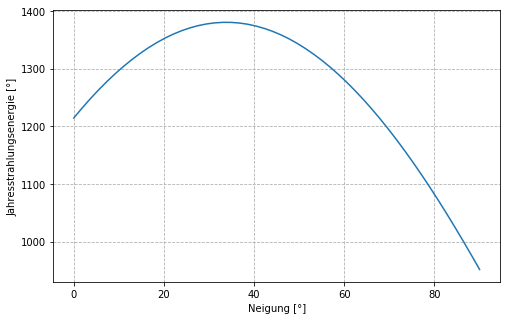

In [12]:
# Parameterdefinition
lg = 9.4     # [grad] Längengrad Buchs
bg = 47.17   # [grad] Breitengrad Buchs
al = 0.2     # [1] Albedo-Faktor
aziFl = 0    # [grad] Azimut Modulfläche

# Sonnenstand
dekl = 23.45*cos(360/(365*24)*(lfStd - 173*24))     # [grad] Deklination
omega = 15 * lfStd + lg - 180                       # [grad] Stundenwinkel laufend
omega = np.mod(omega + 180, 360) - 180              # [grad] Stundenwinkel -180° bis 180°
h = asin(sin(dekl)*sin(bg) + cos(dekl)*cos(bg)*cos(omega)) # [grad] Sonnenhöhe
aziNachmittag =  acos((sin(h)*sin(bg) - sin(dekl))/(cos(h)*cos(bg)))
aziVormittag  = -acos((sin(h)*sin(bg) - sin(dekl))/(cos(h)*cos(bg)))
azi = (np.sign(omega) + 1)/2*aziNachmittag - (np.sign(omega) - 1)/2*aziVormittag
h[h<0] = 0

neigung = np.linspace(0,90,50)
wH = np.zeros(neigung.size)
for n in range(neigung.size):
    neig = neigung[n]
    
    # Strahlentransformationsmodell
    cosTheta = cos(neig)*sin(h) + sin(neig)*cos(h)*cos(azi - aziFl)
    cosTheta[cosTheta<0] = 0
    hDifFl = hDif*(1 + cos(neig))/2
    hAlbFl = hGlo*al*(1 - cos(neig))/2
    hDirFl = hDir/np.maximum(sin(h), sin(5))*cosTheta
    hFl = hDirFl + hDifFl + hAlbFl
    wH[n] = np.sum(hFl)*deltaT/1000 # [kWh/m2] Jahresstrahlungsenergie    
    
# Darstellung
fig  = plt.figure(1, figsize=(8,5))
plt.plot(neigung, wH)
plt.xlabel('Neigung [°]')
plt.ylabel('Jahresstrahlungsenergie [°]')
plt.grid(which='both', linestyle='--')

Aufbau des Code-Beispiels: Es wird der Jahresertrag für unterschiedliche Flächenneigung berechnet (von $0^\circ$ bis $90^\circ$). Hierfür wird eine for-Schleife, um den Berechnungscode fürs Strahlentransformationsmodell gelegt. Innerhalb der for-Schleife wird die Leistung übers gesamte Jahr berechnet und für die Jahresenergie (wH) aufsummieren. Weiter wird die Summe durch 1000 geteilt um kWh anstatt Wh zu erhalten.

Weitere Hinweise zum Code:
 - Bei der Berechnung des Direktstrahlungsanteils ist eine Division von sin(h) notwendig. Wenn h = 0 ist, führt dies zu Problemen in der Berechnung, weshalb die Werte auf eine Sonnenhöhe von $5^\circ$ limitiert werden. Implementierung sieht wie folgt aus, anstatt sin(h) wird np.maximum(sin(h),sin(5)) verwendet.
 - Bei der Python-Implementierung ist darauf zu achten das "np.maximum()" verwendet wird, anstatt "max"! Diese Funktionen sind nicht identisch. Überprüfe den Unterschied. np.maximum ermittelt elementweise das Maximum bei zwei Array's.
 - Bei der Berechnung der Direktstrahlungskomponente wird der Zwischenwinkel $\Theta$ benötigt. Ist dieser über 90° heisst dies das die Direktstrahlung hinter dem Modul ist. Deshalb müssen diese Werte korrigiert werden.

    theta[theta>90] = 90
    
    Bei genauerer Betrachtung der Berechnung ist nicht $\Theta$ in der Berechnung notwendig, sondern $cos(\Theta)$. Die Korrektur sieht dann wie folgt aus:

    cosTheta[cosTheta<0] = 0

Zur Kontrolle der Berrechnung vergleiche die Ergebnisse mit PVGIS für den berechneten Standort Buchs. Beachte das die Jahresstrahlungsenergie in kWh/m2 gesucht ist. In PVGIS ist dies "H" nicht "E". Trafe die PVGIS-Werte ebenfalls ins Diagramm ein.

## Schritt 3
*** Aufgabe Optimale Ausrichtung: *** Variieren wir nicht einen Parameter, wie oben die Neigung, sondern einen zweiten Parameter, den Azimut, so lässt sich das Ergebnis als 3D-Plot darstellen oder als Contour-Plot (siehe Tutorial IntroPython). 

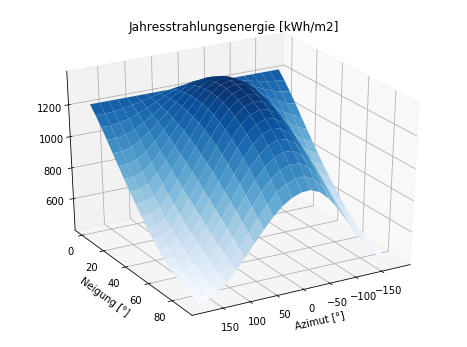

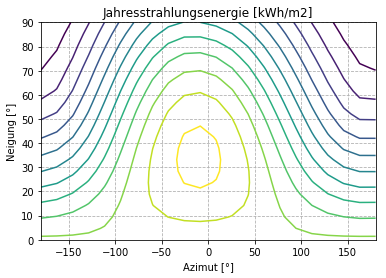

In [17]:
#################
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#################

neigung = np.linspace(0,90,20)
aziFlae = np.linspace(-180,180,22)
wH = np.zeros((neigung.size, aziFlae.size))
for n in range(neigung.size):
    for a in range(aziFlae.size):
        neig  = neigung[n]
        aziFl = aziFlae[a]
        
        # Strahlentransformationsmodell
        cosTheta = cos(neig)*sin(h) + sin(neig)*cos(h)*cos(azi - aziFl)
        cosTheta[cosTheta<0] = 0
        hDifFl = hDif*(1 + cos(neig))/2
        hAlbFl = hGlo*al*(1 - cos(neig))/2
        hDirFl = hDir/np.maximum(sin(h), sin(5))*cosTheta
        hFl = hDirFl + hDifFl + hAlbFl
        wH[n,a] = np.sum(hFl)*deltaT/1000 # [kWh/m2] Jahresstrahlungsenergie    
    
# Darstellung Surfcae-Plot
fig = plt.figure(1, figsize=(8,6))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(aziFlae,neigung)
surf = ax.plot_surface(X, Y, wH, \
                       rstride=1, cstride=1,\
                       cmap=cm.Blues, linewidth=0.2)
plt.xlabel('Azimut [°]')
plt.ylabel('Neigung [°]')
plt.title('Jahresstrahlungsenergie [kWh/m2]')
ax.view_init(azim=60, elev=29)

# Darstellung Contiour-Plot
fig = plt.figure(2, figsize=(6,4))
CS = plt.contour(X, Y, wH, 15) # 15 Linien
plt.xlabel('Azimut [°]')
plt.ylabel('Neigung [°]')
plt.title('Jahresstrahlungsenergie [kWh/m2]')
plt.grid(which='both', linestyle='--')

# Information zur Simulation von Speicher
Für die Simulation einer Batterie ist neben der Produktion durch PV auch der Verbrauch relevant. Deshalb sind in den Ausgangdaten, d.h. dem importiertem Excel-File auch ein Lastprofil aufgeführt. Das Lastprofil ist syntetisch erstellt aus folgenden Verbrauchern.

![Lastprofil](loadProfile.png)

Bei der Betrachtung von Produktion oder Verbrauch konnten die Zeitreihen als Array vektoriell berechnet werden, was die Simulation sehr effizient machte. Bei der Berechnung des Ladezustands einer Batterie ist der vorgängige Zustand relevant, d.h. es kann nicht mehr vektoriell gerechnet werden, sondern über eine Schleife. 

Bei der Berechnung wird jeder einzelne Zeitschritt berechnet:

#### 1. Berechnung Leistungsbedarf  (Verbrauch abzüglich Produktion)

Prüfen ob Leistungsbedarf durch die Batterie zur Verfügung gestellt werden kann:

a.) Wenn ja wird die Batterie entladen
        
b.) Wenn nicht wird die Leistung aus dem Netz bezogen, abzüglich dem Rest in der Batterie
        
#### 2. Berechnung Überschuss (Produktion abzüglich Verbrauch)

Prüfen ob Batterie nicht voll ist,

a.)	Wenn nicht kann die Batterie geladen werden bis sie voll ist, der Rest wird ins Netz rückgespeist
    
b.)	Wenn die Batterie voll ist, wird der Überschuss ins Netz rückgespeist.


   

Mit diesem Vorgehen wird der Netzbezugenergie (wBez) und die Netzeinspeisung (wEin) übers Jahr kumuliert.

*** Spätestens hier ist es sehr wichtig, wenn als Kommentar die Einheit angegeben wird, um Klarheit zu haben ob Leistung [W] oder Energie [kWh] oder [Wh] gemeint ist! ***

In [44]:
### Parameterdefinition
PR          = 0.75 #[1]
pPVstc      = 2  #[kW]
batCap      = 2  #[kWh]

pPV      = hGlo * PR  * pPVstc # [W] PV-Produktionsleistung
pVer     = pLoad               # [W] Verbrauchsprofil

### Batterie Berechnung
wBez  = 0    # [kWh] Energie Netzbezug
wEin  = 0    # [kWh] Energie Netzeinspeisung   
wBat  = 0    # [kWh] Energie Batteriestand. Annahme das Batterie zu Beginn leer ist

pBedarf = pVer-pPV  # [W] Bedarf ist Verbrauch agzüglich Produktion, jedoch....
pBedarf[pBedarf<0]=0 #...darf der Wert nicht <0 sein (z.B. wenn PV grösser ist als Verbrauch)
for p in range(pPV.size):    
    if wBat >= pBedarf[p]*deltaT/1000:
        wBat = wBat - pBedarf[p]*deltaT/1000    # [kWh]
    else:
        wBez = wBez + pBedarf[p]*deltaT/1000 - wBat   # [kWh]
        wBat  = 0
    pUebersch = np.maximum(pPV[p]-pVer[p], 0) # [W]      
    if wBat <= batCap:
        eNichtladbar = np.maximum(pUebersch*deltaT/1000 - (batCap-wBat),0) #[kWh]
        wBat = wBat + pUebersch*deltaT/1000 - eNichtladbar                 #[kWh] 
        wEin = wEin + eNichtladbar
    else:
        wEin = wEin + pUebersch*deltaT/1000   # [kWh]

wVer = np.sum(pVer)*deltaT/1000 # [kWh] Verbrauch Jahresenergie
wPro = np.sum(pPV)*deltaT/1000  # [kWh] PV-Produktion Jahresenergie
rEV = (wPro-wEin)/wPro *100 # [%] Eigenverbrauchsquote
rA = (wVer-wBez)/wVer *100 # [%] Autarkiegrad
print('Eigenverbrauchsgrad ist '+str(rEV)+' %')
print('Autarkiegrad ist '+str(rA)+' %')

Eigenverbrauchsgrad ist 76.02876153956419 %
Autarkiegrad ist 33.973719306776914 %


Mit dem obigen Code-Beispiel haben wir die Jahresenergie berechnet. Möchten wir einen zeitlichen Verlauf des Ladens und Entladens darstellen an drei Tagen im Jahr, so wird der Code erweitert, markiert mit (\***):

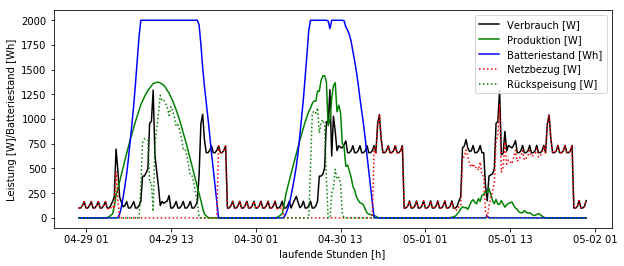

In [45]:
### es wird nur ein Ausschnitt betrachtet, nicht das gesamte Jahr
a  = int(105*24/deltaT)
e  = int(a+3*24/deltaT)
pPV      = hGlo[a:e] * PR  * pPVstc     # [W]
pVer     = pLoad[a:e]
tutcTeil = tutc[a:e]

# Initialisierung Array für Darstellung (***)
batStand      = np.zeros(tutcTeil.size) # Array für Batteriestand
netzbezug     = np.zeros(tutcTeil.size) # Array für Netzleistungsbezug
einspeisung   = np.zeros(tutcTeil.size) # Array für Einspeiseleistung

### Batterie Berechnung
wBez  = 0    # [kWh] Energie Netzbezug
wEin  = 0    # [kWh] Energie Netzeinspeisung   
wBat  = 0    # [kWh] Energie Batteriestand. Annahme das Batterie zu Beginn leer ist

pBedarf = pVer-pPV  # [W] Bedarf ist Verbrauch agzüglich Produktion, jedoch....
pBedarf[pBedarf<0]=0 #...darf der Wert nicht <0 sein (z.B. wenn PV grösser ist als Verbrauch)
for p in range(pPV.size):
    if wBat >= pBedarf[p]*deltaT/1000:
        wBat = wBat - pBedarf[p]*deltaT/1000    # [kWh]
        pBezug = 0                           # [kW] (***)
    else:
        wBez = wBez + pBedarf[p]*deltaT/1000 - wBat   # [kWh]
        wBat  = 0
        pBezug = pBedarf[p] - wBat*1000/deltaT   # [W] (***)
    pUebersch = np.maximum(pPV[p]-pVer[p], 0) # [W]      
    if wBat <= batCap:
        eNichtladbar = np.maximum(pUebersch*deltaT/1000 - (batCap-wBat),0) #[kWh]
        wBat = wBat + pUebersch*deltaT/1000 - eNichtladbar                 #[kWh] 
        wEin = wEin + eNichtladbar
        pEinspeisung = eNichtladbar/deltaT*1000  # [W] (***)
    else:
        wEin = wEin + pUebersch*deltaT/1000   # [kWh]
        pEinspeisung = pUebersch              # [W] (***)
    
    # Berechnete Werte ans Array übergeben (***)
    batStand[p]  = wBat*1000
    netzbezug[p] = pBezug        # [W]
    einspeisung[p] = pEinspeisung   # [W]
 
### Darstellung (***)
fig = plt.figure(6, figsize=(10,4))
plt.plot_date(tutcTeil, pVer,'k', label='Verbrauch [W]')
plt.plot_date(tutcTeil, pPV,'g', label='Produktion [W]')
plt.plot_date(tutcTeil, batStand,'b', label='Batteriestand [Wh]')
plt.plot_date(tutcTeil, netzbezug,'r:', label='Netzbezug [W]')
plt.plot_date(tutcTeil, einspeisung,'g:', label='Rückspeisung [W]')
plt.legend(loc='best')
plt.xlabel('laufende Stunden [h]')
plt.ylabel('Leistung [W]/Batteriestand [Wh]')
plt.show()

### Thermischer Speicher
Mit der selben Logik kann ein thermischer Speicher (Boiler) berechnet werden. Es wird von einer vollständigen Durchmischung im Speicher ausgegangen, d.h. es gibt keine Schichtung. Bei Energieeintrag erhöht sich die Temperatur im Speicher, was in der Praxis einer Stufenladung entspricht und keiner Schichtladung, da von keiner Schichtung ausgegangen wird.

Der Energieinhalt berechnet sich über die Speichertemperatur tsp, Kaltwassertemperatur tkw, der Dichte $\rho$ und spezifischer Wärmekapazität von Wasser cp = 4.182 kJ/(kg K):

$W = vol \cdot \rho \cdot cp \cdot (tsp - tkw)$

Der Speicher hat folgendes Steuerverhalten: bei einer minimalen Speichertemperatur von tMin = 40 °C, wird der Heizstab über das Netz versorgt, sodass ausreichend Warmwasser erzeugt wird. Ist die Nachladung über das Netz aktiviert so bleibt diese aktiv bis der Speicher eine Temperatur von tMaxNetz = 45 °C hat (Hysteresis). Wird über PV geladen so ist die Ausschaltschwelle höher bei tMax     = 85 °C. Es kann so mehr Energie eingelagert werden. Zu berücksichtigen sind Speicherverluste von 23 W. 

In [46]:
### Thermische Speicher Berechnung
vol = 300 # [liter] Speicherinhalt
tkw      = 12 # [°C] Kaltwassertemperatur
tMin     = 40 # [°C] min. Speichertemp. Heizung ein
tMax     = 85 # [°C] max. Speichertemp. bei PV-Ladung
tMaxNetz = 45 # [°C] max. Speichertemp. bei Netz-Ladung
thermalLosses = 23 # [W] Speicherverluste 
pHS      = 2 # [kW] Leistung Heizstab

tSp  = 45 # [°C] Sim.Starttemperatur Speicher       
wBez = 0 # [kWh] Energie Netzbezug
netzLaden = False # Flag welches Netzladung anzeigt
tSpArray = np.zeros(zapf.size)   # [°C] Array für Speichertemperatur
pThermArray = np.zeros(zapf.size) # [W] Array Leistung Heizstab
pzapfArray = np.zeros(zapf.size) # [W] Array Zapf-Leistung     

for p in range(pPV.size):
    if tSp < tMax:
        pTherm = pPV[p] # [W]
    else:
        pTherm = 0 # [W]

    if tSp > tMaxNetz:
        netzLaden = False

    if tSp < tMin:
        netzLaden = True

    if netzLaden == True:
        wBez = wBez + pHS*deltaT # [kWh]
        pTherm = pHS*1000 + pTherm # [W]

    wSp   = vol * 4.182/3.6 * (tSp-tkw) # [Wh] Energieinhalt Speicher vorher
    pzapf = zapf[p]/deltaT * 4.182/3.6 * (tSp-tkw) # [W_therm] gezapfte Leistung
    wSp   = wSp + (pTherm - pzapf - thermalLosses)*deltaT  # [Wh] Energieinhalt Speicher nachher
    tSp = wSp/(vol*4.182/3.6) + tkw # [°C]  neue Speichertemperatur
    tSpArray[p] = tSp # [°C]
    pThermArray[p] = pTherm # [W]
    pzapfArray[p] = pzapf # [W]

Dieses Tutorial wurde mit Jupyter Notebook erstellt, welches ebenfalls in Anaconda-Paket enthalten ist. Markus Markstaler.